In [47]:
%matplotlib inline
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt 
import pandas as pd
import sys 
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
from scipy.stats import gaussian_kde

In [8]:
data = read_csv("../../datasets/heights_weights_genders.csv")

In [9]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

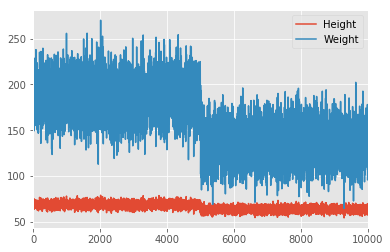

In [13]:
plt.figure()
data.plot()

(array([   3.,    6.,   14.,   40.,   59.,  119.,  186.,  321.,  419.,
         556.,  632.,  718.,  720.,  738.,  738.,  753.,  739.,  675.,
         640.,  513.,  459.,  387.,  219.,  159.,   95.,   44.,   24.,
          16.,    4.,    4.]),
 array([ 54.26313333,  55.08765363,  55.91217393,  56.73669423,
         57.56121453,  58.38573483,  59.21025513,  60.03477543,
         60.85929573,  61.68381603,  62.50833633,  63.33285663,
         64.15737693,  64.98189723,  65.80641754,  66.63093784,
         67.45545814,  68.27997844,  69.10449874,  69.92901904,
         70.75353934,  71.57805964,  72.40257994,  73.22710024,
         74.05162054,  74.87614084,  75.70066114,  76.52518144,
         77.34970174,  78.17422205,  78.99874235]),
 <a list of 30 Patch objects>)

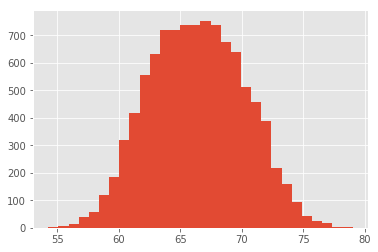

In [42]:
plt.hist(data['Height'], bins=30)

(array([   3.,    3.,    9.,   35.,   83.,  160.,  279.,  409.,  553.,
         682.,  763.,  730.,  641.,  591.,  617.,  610.,  693.,  713.,
         665.,  599.,  483.,  310.,  182.,  106.,   43.,   22.,    6.,
           9.,    0.,    1.]),
 array([  64.70012671,   71.54311244,   78.38609817,   85.22908389,
          92.07206962,   98.91505534,  105.75804107,  112.6010268 ,
         119.44401252,  126.28699825,  133.12998398,  139.9729697 ,
         146.81595543,  153.65894116,  160.50192688,  167.34491261,
         174.18789834,  181.03088406,  187.87386979,  194.71685551,
         201.55984124,  208.40282697,  215.24581269,  222.08879842,
         228.93178415,  235.77476987,  242.6177556 ,  249.46074133,
         256.30372705,  263.14671278,  269.98969851]),
 <a list of 30 Patch objects>)

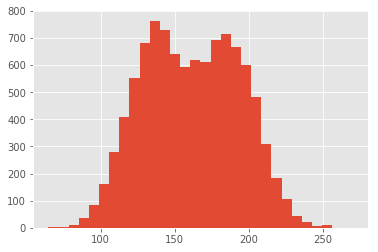

In [36]:
plt.hist(data['Weight'], bins=30)

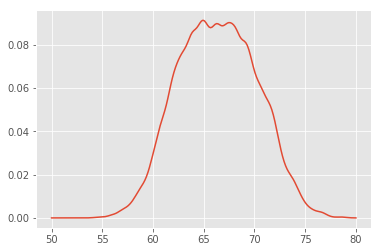

In [66]:
density = gaussian_kde(data["Height"])
xs = np.linspace(50,80,200)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,density(xs))

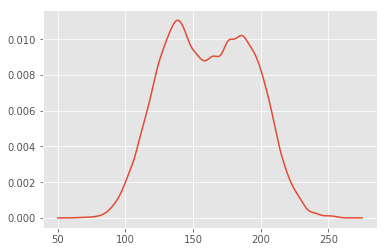

In [71]:
density = gaussian_kde(data["Weight"])
xs = np.linspace(50,275,200)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,density(xs))

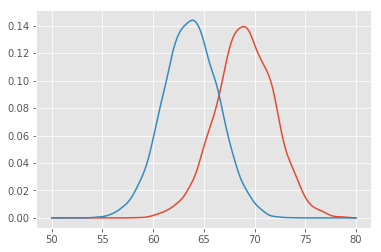

In [79]:
densityMale = gaussian_kde(data["Height"].loc[data["Gender"]=="Male"])
densityFemale = gaussian_kde(data["Height"].loc[data["Gender"]=="Female"])
xs = np.linspace(50,80,200)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,densityMale(xs))
plt.plot(xs,densityFemale(xs))

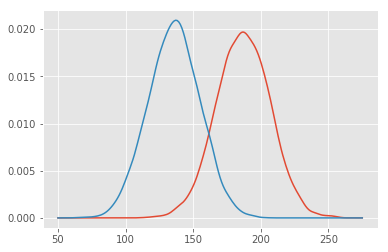

In [81]:
densityMale = gaussian_kde(data["Weight"].loc[data["Gender"]=="Male"])
densityFemale = gaussian_kde(data["Weight"].loc[data["Gender"]=="Female"])
xs = np.linspace(50,275,200)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,densityMale(xs))
plt.plot(xs,densityFemale(xs))